In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
history_frame = pd.read_csv('race_2008_2015_v2.csv', encoding='cp932')
history_frame.head()

,raceinfo_id,hold_date,place_num,place_code,raceno,distance,situation,raceclass_code,weather_name3,popular,...,p2_Other_90_All_Here_numwinwin,p2_Other_90_All_Here_rate1th,p2_Other_90_All_Here_rate2th,p2_Other_90_All_Here_rate3th,p2_Other_90_All_Here_raceaccident,p2_Other_90_All_Here_racehigh,p2_Other_90_All_Here_traialhigh,p2_Other_90_All_Here_stave,p2_Other_90_All_Here_shisou_hensa,p2_Other_90_All_Here_soutei_time
0,7321,2008/1/2 0:00,2,kawaguchi,1,3100,good,1,sunny,4,...,0,0.0,0.0,0.0,0.0,0.000,0.00,0.00,3.408,3.438
1,7321,2008/1/2 0:00,2,kawaguchi,1,3100,good,1,sunny,4,...,0,0.0,0.0,50.0,0.0,3.422,3.38,0.14,3.349,3.379
2,7321,2008/1/2 0:00,2,kawaguchi,1,3100,good,1,sunny,4,...,0,0.0,0.0,0.0,0.0,0.000,0.00,0.00,3.443,3.463
3,7321,2008/1/2 0:00,2,kawaguchi,1,3100,good,1,sunny,4,...,0,0.0,0.0,0.0,0.0,3.449,3.41,0.12,3.370,3.390
4,7321,2008/1/2 0:00,2,kawaguchi,1,3100,good,1,sunny,4,...,0,0.0,0.0,0.0,0.0,0.000,0.00,0.00,3.444,3.454


In [3]:
predict_frame = pd.read_csv('predict_v2.csv')
predict_frame.head()

,raceinfo_id,place_num,place_code,raceno,distance,situation,raceclass_code,weather_name3,popular,roadtemp,...,p2_Other_90_All_Here_numwinwin,p2_Other_90_All_Here_rate1th,p2_Other_90_All_Here_rate2th,p2_Other_90_All_Here_rate3th,p2_Other_90_All_Here_raceaccident,p2_Other_90_All_Here_racehigh,p2_Other_90_All_Here_traialhigh,p2_Other_90_All_Here_stave,p2_Other_90_All_Here_shisou_hensa,p2_Other_90_All_Here_soutei_time
0,52674,2,kawaguchi,1,3100,good,3,sunny,2,14,...,0,0.0,0.0,0.0,0.0,3.539,3.47,0.19,3.520,3.520
1,52674,2,kawaguchi,1,3100,good,3,sunny,2,14,...,0,0.0,0.0,0.0,0.0,0.000,0.00,0.00,3.517,3.517
2,52674,2,kawaguchi,1,3100,good,3,sunny,2,14,...,0,0.0,0.0,0.0,0.0,0.000,0.00,0.00,3.496,3.506
3,52674,2,kawaguchi,1,3100,good,3,sunny,2,14,...,0,0.0,50.0,50.0,0.0,3.494,3.40,0.17,3.424,3.434
4,52674,2,kawaguchi,1,3100,good,3,sunny,2,14,...,0,0.0,0.0,0.0,33.3,3.543,3.45,0.25,3.402,3.422


In [4]:
history_frame.columns.values

array(['raceinfo_id', 'hold_date', 'place_num', 'place_code', 'raceno',
       'distance', 'situation', 'raceclass_code', 'weather_name3',
       'popular', 'roadtemp', 'temp', 'humid', 'motorbikeno',
       'player_code', 'all_refund', 'all_race_order', 'xorder',
       'racetime', 'all_racetime', 'handicap', 'traialtime', 'home',
       'hensa', 'shisou_hensa', 'soutei_time', 'age', 'graduation',
       'rank_now', 'rank_last', 'point', 'last10_num1th', 'last10_num2th',
       'last10_num3th', 'last10_numother', 'last10_rate2th',
       'last10_rate3th', 'last10_trialave', 'last10_raceave',
       'last10_racehigh', 'last90_numall', 'last90_numwin',
       'last90_numwinwin', 'last90_hightime', 'last90_highplace',
       'last90_highplace_home', 'last90_stave', 'last180_rate0_rate2th',
       'last180_rate0_numall', 'last180_rate0_num2th',
       'last180_rate1_rate2th', 'last180_rate1_numall',
       'last180_rate1_num2th', 'last5_times1_home', 'last5_times1_race',
       'last5_tim

In [5]:
# check which racer included in predict but exluded from history
predict_frame['player_code'].loc[~predict_frame['player_code'].isin(history_frame['player_code'])].nunique()

20

In [6]:
predict_frame['player_code'].nunique()

416

# Replace symbols

In [7]:
history_frame['situation'].unique()

array(['good', 'rough', 'wind', 'wet', 'rash', 'oil'], dtype=object)

In [8]:
predict_frame['situation'].unique()

array(['good', 'rash', 'wet', 'wind', 'oil', 'rough'], dtype=object)

In [9]:
situation_dict = {'良走路': 'good', '荒': 'rash', '風': 'wind', 
                  '湿走路': 'wet', '斑走路': 'spots', 'オイル': 'oil'}

In [10]:
history_frame['situation'].replace(situation_dict, inplace=True)

In [11]:
history_frame['weather_name3'].unique()

array(['sunny', 'cloud', 'rain', 'lightrain', 'lightsnow', 'snow', nan],
      dtype=object)

In [12]:
predict_frame['weather_name3'].unique()

array(['sunny', 'cloud', 'lightrain', 'rain', 'lightsnow', 'snow'],
      dtype=object)

In [13]:
weather_dict = {'晴': 'sunny', '曇': 'cloud', '雨': 'rain', 
                '小雨': 'lightrain', '小雪': 'lightsnow', '雪': 'snow'}

In [14]:
history_frame['weather_name3'].replace(weather_dict, inplace=True)

In [15]:
# another symbol columns
object_columns = history_frame.select_dtypes('object').columns

In [16]:
history_frame[object_columns].sample(5)

,hold_date,place_code,situation,weather_name3,all_refund,all_race_order,rank_now,rank_last,last90_highplace
72037,2009/11/15 0:00,isesaki,wind,sunny,820:100_100_150:0:220:140_250_300:440:470:1540,1_4_2_3_6_5_7_8,B-95,B-120,isesaki
300091,2015-12-05 00:00:00,iizuka,rash,sunny,110:100_100_160:0:420:350_300_1060:490:600:1490,8_4_5_2_7_1_3_6,A-267,B-61,isesaki
228362,2014/4/14 0:00,isesaki,good,sunny,170:100_100_100:0:480:130_200_110:580:440:1400,4_5_8_3_6_7_2_1,B-74,B-45,funabashi
129820,2011/7/27 0:00,hamamatsu,rash,lightrain,100:100_110_150:0:260:200_700_370:760:1140:3400,1_7_2_5_3_4_8_6,B-39,B-24,isesaki
275078,2015-05-15 00:00:00,kawaguchi,good,sunny,200:100_100_200:0:190:120_370_300:440:500:1550,3_8_6_1_7_2_5_4,A-92,A-102,hamamatsu


In [17]:
history_frame['last90_highplace'].unique()

array(['kawaguchi', 'funabashi', 'sanyou', 'hamamatsu', 'iizuka',
       'isesaki', nan], dtype=object)

In [18]:
predict_frame['last90_highplace'].unique()

array(['kawaguchi', 'iizuka', 'hamamatsu', 'sanyou', 'isesaki', nan],
      dtype=object)

In [19]:
last90_highplace_dict = {'川': 'kawaguchi', '船': 'funabashi', '山': 'sanyou',                          
                        '浜': 'hamamatsu', '飯': 'iizuka', '伊': 'isesaki'}

In [20]:
history_frame['last90_highplace'].replace(last90_highplace_dict, inplace=True)

# show one sample

In [21]:
d = dict(history_frame.iloc[0])

In [22]:
d

{'raceinfo_id': 7321,
 'hold_date': '2008/1/2 0:00',
 'place_num': 2,
 'place_code': 'kawaguchi',
 'raceno': 1,
 'distance': 3100,
 'situation': 'good',
 'raceclass_code': 1,
 'weather_name3': 'sunny',
 'popular': 4,
 'roadtemp': 19.0,
 'temp': 9,
 'humid': 42,
 'motorbikeno': 1,
 'player_code': 602,
 'all_refund': '900:110_100_100:0:740:250_220_120:2310:320:3940',
 'all_race_order': '7_2_1_8_4_3_6_5',
 'xorder': 3,
 'racetime': 3.409,
 'all_racetime': 106.7017,
 'handicap': 30,
 'traialtime': 3.32,
 'home': 1,
 'hensa': 0.088,
 'shisou_hensa': 3.408,
 'soutei_time': 3.438,
 'age': 59,
 'graduation': 6,
 'rank_now': 'A-37',
 'rank_last': 'S-38',
 'point': 81.72399999999999,
 'last10_num1th': 0,
 'last10_num2th': 3,
 'last10_num3th': 3,
 'last10_numother': 3,
 'last10_rate2th': 30.0,
 'last10_rate3th': 60.0,
 'last10_trialave': 3.34,
 'last10_raceave': 3.428,
 'last10_racehigh': 3.41,
 'last90_numall': 21,
 'last90_numwin': 1,
 'last90_numwinwin': 0,
 'last90_hightime': 3.41,
 'last90_h

In [23]:
history_frame['player_code'].nunique() # number of racers

554

In [24]:
history_frame['raceinfo_id'].nunique() # number of races

37945

In [25]:
# dropped columns from predict_frame
set(history_frame.columns) - set(predict_frame.columns)

{'all_race_order',
 'all_racetime',
 'all_refund',
 'hold_date',
 'racetime',
 'xorder'}

# Make interaction table

In [26]:
hist_interactions = pd.get_dummies(history_frame['player_code'])
#hist_interactions.index = history_frame['raceinfo_id']
hist_interactions.shape

(303149, 554)

In [27]:
hist_interactions.head(2)

,103,111,208,210,407,408,409,410,411,415,...,8030,8031,8032,9001,9002,9003,9004,9005,9006,9007
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
pred_interactions = pd.get_dummies(predict_frame['player_code'])
#pred_interactions.index = predict_frame['raceinfo_id']
pred_interactions = pred_interactions * 0 # clear all marks
pred_interactions.head(2)

,103,208,210,408,502,706,807,813,818,912,...,9005,9006,9007,9008,9009,9010,9011,9012,9013,9014
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
pred_interactions.tail()

,103,208,210,408,502,706,807,813,818,912,...,9005,9006,9007,9008,9009,9010,9011,9012,9013,9014
40357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40359,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40360,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# we will concat two interactions matrix later

#interactions = pd.concat([hist_interactions, pred_interactions])
#interactions.fillna(0, inplace=True)
#interactions.shape

In [31]:
hist_interactions['xorder'] = history_frame['xorder']
one_hot_cols = hist_interactions.columns.drop('xorder')

In [32]:
%%time
hist_interactions[one_hot_cols] = hist_interactions[one_hot_cols].multiply(hist_interactions['xorder'], axis="index")

Wall time: 22.3 s


In [33]:
hist_interactions.head()

,103,111,208,210,407,408,409,410,411,415,...,8031,8032,9001,9002,9003,9004,9005,9006,9007,xorder
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [34]:
hist_interactions.drop('xorder', axis=1, inplace=True)
hist_interactions['raceinfo_id'] = history_frame['raceinfo_id']
hist_interactions = hist_interactions.groupby('raceinfo_id').sum()

In [35]:
hist_interactions.shape # unique races * unique racers

(37945, 554)

In [36]:
hist_interactions.head(3)

,103,111,208,210,407,408,409,410,411,415,...,8030,8031,8032,9001,9002,9003,9004,9005,9006,9007
raceinfo_id,,,,,,,,,,,,,,,,,,,,,
7321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# invert range point >> less place number - more points
range_dict = {k:v for k,v in zip(range(1, 10), range(9, 0, -1))}
hist_interactions.replace(range_dict, inplace=True)

In [38]:
# lets check order in first race
history_frame.iloc[0]['raceinfo_id']

7321

In [39]:
history_frame.loc[history_frame['raceinfo_id']==7321][['xorder', 'player_code']].sort_values(by='xorder', ascending=True)

,xorder,player_code
6,1,1312
1,2,2620
0,3,602
7,4,1108
3,5,2625
2,6,2425
5,7,2321
4,8,2912


In [40]:
hist_interactions.iloc[0].sort_values(ascending=False)[:8]

1312    9
2620    8
602     7
1108    6
2625    5
2425    4
2321    3
2912    2
Name: 7321, dtype: int64

In [41]:
hist_interactions.columns[-5:]

Index([9003, 9004, 9005, 9006, 9007], dtype='object')

# track features and racer features

In [42]:
# select track features and racer features
history_frame.columns.values

array(['raceinfo_id', 'hold_date', 'place_num', 'place_code', 'raceno',
       'distance', 'situation', 'raceclass_code', 'weather_name3',
       'popular', 'roadtemp', 'temp', 'humid', 'motorbikeno',
       'player_code', 'all_refund', 'all_race_order', 'xorder',
       'racetime', 'all_racetime', 'handicap', 'traialtime', 'home',
       'hensa', 'shisou_hensa', 'soutei_time', 'age', 'graduation',
       'rank_now', 'rank_last', 'point', 'last10_num1th', 'last10_num2th',
       'last10_num3th', 'last10_numother', 'last10_rate2th',
       'last10_rate3th', 'last10_trialave', 'last10_raceave',
       'last10_racehigh', 'last90_numall', 'last90_numwin',
       'last90_numwinwin', 'last90_hightime', 'last90_highplace',
       'last90_highplace_home', 'last90_stave', 'last180_rate0_rate2th',
       'last180_rate0_numall', 'last180_rate0_num2th',
       'last180_rate1_rate2th', 'last180_rate1_numall',
       'last180_rate1_num2th', 'last5_times1_home', 'last5_times1_race',
       'last5_tim

In [43]:
history_frame.head()

,raceinfo_id,hold_date,place_num,place_code,raceno,distance,situation,raceclass_code,weather_name3,popular,...,p2_Other_90_All_Here_numwinwin,p2_Other_90_All_Here_rate1th,p2_Other_90_All_Here_rate2th,p2_Other_90_All_Here_rate3th,p2_Other_90_All_Here_raceaccident,p2_Other_90_All_Here_racehigh,p2_Other_90_All_Here_traialhigh,p2_Other_90_All_Here_stave,p2_Other_90_All_Here_shisou_hensa,p2_Other_90_All_Here_soutei_time
0,7321,2008/1/2 0:00,2,kawaguchi,1,3100,good,1,sunny,4,...,0,0.0,0.0,0.0,0.0,0.000,0.00,0.00,3.408,3.438
1,7321,2008/1/2 0:00,2,kawaguchi,1,3100,good,1,sunny,4,...,0,0.0,0.0,50.0,0.0,3.422,3.38,0.14,3.349,3.379
2,7321,2008/1/2 0:00,2,kawaguchi,1,3100,good,1,sunny,4,...,0,0.0,0.0,0.0,0.0,0.000,0.00,0.00,3.443,3.463
3,7321,2008/1/2 0:00,2,kawaguchi,1,3100,good,1,sunny,4,...,0,0.0,0.0,0.0,0.0,3.449,3.41,0.12,3.370,3.390
4,7321,2008/1/2 0:00,2,kawaguchi,1,3100,good,1,sunny,4,...,0,0.0,0.0,0.0,0.0,0.000,0.00,0.00,3.444,3.454


In [44]:
# win columns has been dropped from second version of dataset
# need to add win column from first version
first_version = pd.read_csv('2008_2016.csv', encoding='cp932', usecols=['raceinfo_id', 'player_code', 'win'])
first_version.head()

,win,raceinfo_id,player_code
0,0,7321,602
1,0,7321,2620
2,0,7321,2425
3,0,7321,2625
4,0,7321,2912


In [45]:
first_version.shape, history_frame.shape

((344177, 3), (303149, 364))

In [46]:
history_frame = history_frame.merge(first_version, on=['raceinfo_id', 'player_code'], how='left')

In [47]:
history_frame['win'].unique()

array([0, 1], dtype=int64)

In [48]:
history_frame[history_frame['win']==1]['xorder']

6         1
9         1
17        1
27        1
33        1
         ..
303116    1
303123    1
303126    1
303135    1
303143    1
Name: xorder, Length: 37945, dtype: int64

# Wins history on tracks

In [49]:
wins = history_frame[['player_code', 'raceinfo_id','hold_date', 'place_code', 'win']].loc[history_frame['win']==1]
wins.head()

,player_code,raceinfo_id,hold_date,place_code,win
6,1312,7321,2008/1/2 0:00,kawaguchi,1
9,2107,7322,2008/1/2 0:00,kawaguchi,1
17,2918,7323,2008/1/2 0:00,kawaguchi,1
27,2506,7324,2008/1/2 0:00,kawaguchi,1
33,2314,7325,2008/1/2 0:00,kawaguchi,1


In [50]:
%%time
wins['hold_date'] = wins['hold_date'].apply(pd.to_datetime)

Wall time: 2.21 s


In [51]:
wins.head(2)

,player_code,raceinfo_id,hold_date,place_code,win
6,1312,7321,2008-01-02,kawaguchi,1
9,2107,7322,2008-01-02,kawaguchi,1


In [52]:
wins = wins.merge(wins[['player_code', 'place_code', 'hold_date', 'win']], 
               on=['player_code', 'place_code'], how='left', suffixes=('', '_agg'))
wins.head(2)

,player_code,raceinfo_id,hold_date,place_code,win,hold_date_agg,win_agg
0,1312,7321,2008-01-02,kawaguchi,1,2008-01-02,1
1,1312,7321,2008-01-02,kawaguchi,1,2008-01-03,1


In [53]:
wins = wins.loc[wins['hold_date'] > wins['hold_date_agg']]
wins.head(2)

,player_code,raceinfo_id,hold_date,place_code,win,hold_date_agg,win_agg
2267,1902,7361,2008-01-03,kawaguchi,1,2008-01-02,1
2278,1312,7362,2008-01-03,kawaguchi,1,2008-01-02,1


In [54]:
wins.sort_values(by='hold_date', ascending=False, inplace=True)
wins.head(2)

,player_code,raceinfo_id,hold_date,place_code,win,hold_date_agg,win_agg
1701827,3101,52397,2015-12-31,kawaguchi,1,2015-12-27,1
1701460,2123,52390,2015-12-31,kawaguchi,1,2013-07-16,1


In [55]:
wins = wins.groupby(['player_code', 'place_code', 'hold_date'])['win_agg'].sum().reset_index()
wins.sort_values('hold_date', ascending=False, inplace=True)
wins.drop_duplicates(subset=['player_code', 'place_code'], keep='first', inplace=True)
wins.head(2)

,player_code,place_code,hold_date,win_agg
35268,9007,kawaguchi,2015-12-31,48
14943,2407,kawaguchi,2015-12-31,10


In [56]:
wins = wins.pivot_table(index='player_code', columns='place_code')
wins = wins['win_agg']
wins.fillna(0, inplace=True)
wins.head(2)

place_code,funabashi,hamamatsu,iizuka,isesaki,kawaguchi,sanyou
player_code,,,,,,
103,1.0,15.0,0.0,0.0,2.0,0.0
111,0.0,3.0,0.0,0.0,0.0,4.0


In [57]:
wins.shape, history_frame['player_code'].nunique()

((512, 6), 554)

In [58]:
wins.head()

place_code,funabashi,hamamatsu,iizuka,isesaki,kawaguchi,sanyou
player_code,,,,,,
103,1.0,15.0,0.0,0.0,2.0,0.0
111,0.0,3.0,0.0,0.0,0.0,4.0
208,7.0,44.0,0.0,3.0,10.0,0.0
210,2.0,14.0,0.0,1.0,3.0,0.0
407,0.0,0.0,0.0,0.0,38.0,0.0


In [59]:
# переименовать
toAddNumbers = history_frame['player_code'].loc[~history_frame['player_code'].isin(wins.index)].unique()

In [60]:
toAddFrame = pd.DataFrame(np.zeros((toAddNumbers.shape[0], wins.shape[1])), 
                          index=toAddNumbers, columns=wins.columns)
toAddFrame.sort_index(inplace=True)
toAddFrame.head()

place_code,funabashi,hamamatsu,iizuka,isesaki,kawaguchi,sanyou
410,0.0,0.0,0.0,0.0,0.0,0.0
411,0.0,0.0,0.0,0.0,0.0,0.0
1124,0.0,0.0,0.0,0.0,0.0,0.0
1221,0.0,0.0,0.0,0.0,0.0,0.0
1306,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
wins = wins.append(toAddFrame)
wins.shape

(554, 6)

In [62]:
wins.columns.name = 'player_code'
wins.head()

player_code,funabashi,hamamatsu,iizuka,isesaki,kawaguchi,sanyou
103,1.0,15.0,0.0,0.0,2.0,0.0
111,0.0,3.0,0.0,0.0,0.0,4.0
208,7.0,44.0,0.0,3.0,10.0,0.0
210,2.0,14.0,0.0,1.0,3.0,0.0
407,0.0,0.0,0.0,0.0,38.0,0.0


In [63]:
mean_wins = wins.mean(axis=1)
sum_wins = wins.sum(axis=1)
max_wins = wins.max(axis=1)

# track features and racer features

In [64]:
track_features = ['raceinfo_id', 'distance', 'situation', 
                  'raceclass_code', 'weather_name3', 'roadtemp',
                  'temp', 'humid', 'place_code', 'raceno']

racer_features = ['player_code', 'popular', 'motorbikeno', 
                 'handicap', 'home', 'age', #'bike_class', - dropped
                 'graduation', 'rank_now', 'rank_last', 
                 'point']

In [65]:
lasts_features = [i for i in history_frame.columns if (i.startswith('last') and '_' in i)]
p2_features = [i for i in history_frame.columns if i.startswith('p2_')]

In [66]:
racer_features = racer_features + lasts_features + p2_features + ['hold_date']
racer_features[:20]

['player_code',
 'popular',
 'motorbikeno',
 'handicap',
 'home',
 'age',
 'graduation',
 'rank_now',
 'rank_last',
 'point',
 'last10_num1th',
 'last10_num2th',
 'last10_num3th',
 'last10_numother',
 'last10_rate2th',
 'last10_rate3th',
 'last10_trialave',
 'last10_raceave',
 'last10_racehigh',
 'last90_numall']

In [67]:
track_frame = history_frame[track_features].copy()
track_frame.drop_duplicates(inplace=True)
track_frame.head(3)

,raceinfo_id,distance,situation,raceclass_code,weather_name3,roadtemp,temp,humid,place_code,raceno
0,7321,3100,good,1,sunny,19.0,9,42,kawaguchi,1
8,7322,3100,good,1,sunny,20.0,9,38,kawaguchi,2
16,7323,3100,good,1,sunny,21.0,10,36,kawaguchi,3


In [68]:
track_frame['raceinfo_id'].duplicated().sum()

0

In [69]:
track_frame.shape

(37945, 10)

In [70]:
track_frame.set_index('raceinfo_id', inplace=True)

In [71]:
track_frame.head(3)

,distance,situation,raceclass_code,weather_name3,roadtemp,temp,humid,place_code,raceno
raceinfo_id,,,,,,,,,
7321,3100,good,1,sunny,19.0,9,42,kawaguchi,1
7322,3100,good,1,sunny,20.0,9,38,kawaguchi,2
7323,3100,good,1,sunny,21.0,10,36,kawaguchi,3


## track features engineering

In [72]:
track_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37945 entries, 7321 to 52397
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distance        37945 non-null  int64  
 1   situation       37945 non-null  object 
 2   raceclass_code  37945 non-null  int64  
 3   weather_name3   37944 non-null  object 
 4   roadtemp        37945 non-null  float64
 5   temp            37945 non-null  int64  
 6   humid           37945 non-null  int64  
 7   place_code      37945 non-null  object 
 8   raceno          37945 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 2.9+ MB


In [73]:
track_frame['situation'].unique()

array(['good', 'rough', 'wind', 'wet', 'rash', 'oil'], dtype=object)

In [74]:
situation = pd.get_dummies(track_frame['situation'], prefix='situation')
situation.head()

,situation_good,situation_oil,situation_rash,situation_rough,situation_wet,situation_wind
raceinfo_id,,,,,,
7321,1,0,0,0,0,0
7322,1,0,0,0,0,0
7323,1,0,0,0,0,0
7324,1,0,0,0,0,0
7325,1,0,0,0,0,0


In [75]:
track_frame['weather_name3'].unique()

array(['sunny', 'cloud', 'rain', 'lightrain', 'lightsnow', 'snow', nan],
      dtype=object)

In [76]:
weather = pd.get_dummies(track_frame['weather_name3'], prefix='weather')
weather.head()

,weather_cloud,weather_lightrain,weather_lightsnow,weather_rain,weather_snow,weather_sunny
raceinfo_id,,,,,,
7321,0,0,0,0,0,1
7322,0,0,0,0,0,1
7323,0,0,0,0,0,1
7324,0,0,0,0,0,1
7325,0,0,0,0,0,1


In [77]:
track_frame['place_code'].unique()

array(['kawaguchi', 'hamamatsu', 'iizuka', 'isesaki', 'funabashi',
       'sanyou'], dtype=object)

In [78]:
place = pd.get_dummies(track_frame['place_code'], prefix='place_is')
place.head()

,place_is_funabashi,place_is_hamamatsu,place_is_iizuka,place_is_isesaki,place_is_kawaguchi,place_is_sanyou
raceinfo_id,,,,,,
7321,0,0,0,0,1,0
7322,0,0,0,0,1,0
7323,0,0,0,0,1,0
7324,0,0,0,0,1,0
7325,0,0,0,0,1,0


In [79]:
track_frame.head(3)

,distance,situation,raceclass_code,weather_name3,roadtemp,temp,humid,place_code,raceno
raceinfo_id,,,,,,,,,
7321,3100,good,1,sunny,19.0,9,42,kawaguchi,1
7322,3100,good,1,sunny,20.0,9,38,kawaguchi,2
7323,3100,good,1,sunny,21.0,10,36,kawaguchi,3


In [80]:
track_frame.drop(columns=['situation', 'weather_name3', 'place_code'], inplace=True)

In [81]:
track_frame = pd.concat([track_frame, situation, weather, place], axis=1)
track_frame.head(3)

,distance,raceclass_code,roadtemp,temp,humid,raceno,situation_good,situation_oil,situation_rash,situation_rough,...,weather_lightsnow,weather_rain,weather_snow,weather_sunny,place_is_funabashi,place_is_hamamatsu,place_is_iizuka,place_is_isesaki,place_is_kawaguchi,place_is_sanyou
raceinfo_id,,,,,,,,,,,,,,,,,,,,,
7321,3100,1,19.0,9,42,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7322,3100,1,20.0,9,38,2,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7323,3100,1,21.0,10,36,3,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## racer features engineering

In [82]:
racer_frame = history_frame[racer_features].copy()
racer_frame.head()

,player_code,popular,motorbikeno,handicap,home,age,graduation,rank_now,rank_last,point,...,p2_Other_90_All_Here_rate1th,p2_Other_90_All_Here_rate2th,p2_Other_90_All_Here_rate3th,p2_Other_90_All_Here_raceaccident,p2_Other_90_All_Here_racehigh,p2_Other_90_All_Here_traialhigh,p2_Other_90_All_Here_stave,p2_Other_90_All_Here_shisou_hensa,p2_Other_90_All_Here_soutei_time,hold_date
0,602,4,1,30,1,59,6,A-37,S-38,81.724,...,0.0,0.0,0.0,0.0,0.000,0.00,0.00,3.408,3.438,2008/1/2 0:00
1,2620,4,2,30,1,32,26,S-52,S-50,89.141,...,0.0,0.0,50.0,0.0,3.422,3.38,0.14,3.349,3.379,2008/1/2 0:00
2,2425,4,3,20,1,35,24,A-90,A-72,75.002,...,0.0,0.0,0.0,0.0,0.000,0.00,0.00,3.443,3.463,2008/1/2 0:00
3,2625,4,4,20,1,33,26,A-18,A-87,84.382,...,0.0,0.0,0.0,0.0,3.449,3.41,0.12,3.370,3.390,2008/1/2 0:00
4,2912,4,5,10,1,29,29,A-172,B-1,64.817,...,0.0,0.0,0.0,0.0,0.000,0.00,0.00,3.444,3.454,2008/1/2 0:00


In [83]:
racer_frame.shape

(303149, 340)

In [84]:
racer_frame.sort_values(by='hold_date', ascending=True, inplace=True)

In [85]:
racer_frame.drop_duplicates(subset=['player_code'], keep='last', inplace=True)

In [86]:
racer_frame.shape

(554, 340)

In [87]:
racer_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 38842 to 303148
Columns: 340 entries, player_code to hold_date
dtypes: float64(201), int64(135), object(4)
memory usage: 1.4+ MB


In [88]:
obj_racer_cols = racer_frame.select_dtypes('object').columns
racer_frame[obj_racer_cols].head(3)

,rank_now,rank_last,last90_highplace,hold_date
38842,B-20,A-177,hamamatsu,2009/1/4 0:00
46459,B-200,B-196,sanyou,2009/3/15 0:00
47423,B-201,B-201,isesaki,2009/3/27 0:00


In [89]:
racer_frame.drop('hold_date', axis=1, inplace=True)

In [90]:
obj_racer_cols = obj_racer_cols[:-1]
obj_racer_cols

Index(['rank_now', 'rank_last', 'last90_highplace'], dtype='object')

In [91]:
#racer_frame.set_index('player_code', inplace=True)
racer_frame.head(3)

,player_code,popular,motorbikeno,handicap,home,age,graduation,rank_now,rank_last,point,...,p2_Other_90_All_Here_numwinwin,p2_Other_90_All_Here_rate1th,p2_Other_90_All_Here_rate2th,p2_Other_90_All_Here_rate3th,p2_Other_90_All_Here_raceaccident,p2_Other_90_All_Here_racehigh,p2_Other_90_All_Here_traialhigh,p2_Other_90_All_Here_stave,p2_Other_90_All_Here_shisou_hensa,p2_Other_90_All_Here_soutei_time
38842,1901,2,3,70,1,46,19,B-20,A-177,60.547,...,0,0.0,0.0,0.0,0.0,3.460,3.38,0.16,0.102,0.172
46459,2513,2,4,0,1,33,25,B-200,B-196,35.859,...,0,0.0,0.0,0.0,0.0,3.661,3.53,0.15,3.708,3.708
47423,2211,3,8,0,1,41,22,B-201,B-201,35.028,...,0,0.0,0.0,0.0,0.0,3.603,3.50,0.13,3.620,3.620


In [92]:
racer_frame['rank_last_symbol'] = racer_frame['rank_last'].apply(lambda x: x[0] if type(x)==str else 'O')
racer_frame['rank_last_symbol'].unique()

array(['A', 'B', 'O', 'S'], dtype=object)

In [93]:
racer_frame['rank_now_symbol'] = racer_frame['rank_now'].apply(lambda x: x[0] if type(x)==str else 'O')
racer_frame['rank_now_symbol'].unique()

array(['B', 'A', 'S'], dtype=object)

In [94]:
symbols = pd.get_dummies(racer_frame[['rank_last_symbol', 'rank_now_symbol']])

In [95]:
last90_highplace_dummy = pd.get_dummies(racer_frame['last90_highplace'])

In [96]:
obj_racer_cols = racer_frame.select_dtypes('object').columns
obj_racer_cols

Index(['rank_now', 'rank_last', 'last90_highplace', 'rank_last_symbol',
       'rank_now_symbol'],
      dtype='object')

In [97]:
racer_frame.drop(columns=obj_racer_cols, inplace=True)

In [98]:
racer_frame = pd.concat([racer_frame, symbols, last90_highplace_dummy], axis=1)
racer_frame.shape

(554, 349)

In [99]:
racer_frame.head(3)

,player_code,popular,motorbikeno,handicap,home,age,graduation,point,last10_num1th,last10_num2th,...,rank_last_symbol_S,rank_now_symbol_A,rank_now_symbol_B,rank_now_symbol_S,funabashi,hamamatsu,iizuka,isesaki,kawaguchi,sanyou
38842,1901,2,3,70,1,46,19,60.547,1,0,...,0,0,1,0,0,1,0,0,0,0
46459,2513,2,4,0,1,33,25,35.859,0,0,...,0,0,1,0,0,0,0,0,0,1
47423,2211,3,8,0,1,41,22,35.028,0,0,...,0,0,1,0,0,0,0,1,0,0


In [100]:
racer_frame.sort_index(inplace=True)

In [101]:
racer_frame.head(2)

,player_code,popular,motorbikeno,handicap,home,age,graduation,point,last10_num1th,last10_num2th,...,rank_last_symbol_S,rank_now_symbol_A,rank_now_symbol_B,rank_now_symbol_S,funabashi,hamamatsu,iizuka,isesaki,kawaguchi,sanyou
38842,1901,2,3,70,1,46,19,60.547,1,0,...,0,0,1,0,0,1,0,0,0,0
44806,415,5,7,20,1,64,4,42.900,1,2,...,0,0,1,0,0,0,0,0,1,0


In [102]:
racer_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 38842 to 303148
Columns: 349 entries, player_code to sanyou
dtypes: float64(201), int64(135), uint8(13)
memory usage: 1.4 MB


In [103]:
uint8_cols = racer_frame.select_dtypes('uint8').columns

In [104]:
racer_frame[uint8_cols] = racer_frame[uint8_cols].astype(np.int32)

In [105]:
racer_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 38842 to 303148
Columns: 349 entries, player_code to sanyou
dtypes: float64(201), int32(13), int64(135)
memory usage: 1.5 MB


# split on train and test

In [106]:
train_races = history_frame['raceinfo_id'].drop_duplicates()[:-5000] # train
valid_races = history_frame['raceinfo_id'].drop_duplicates()[-5000:] # validation

In [107]:
train_set = history_frame.loc[history_frame['raceinfo_id'].isin(train_races)][['raceinfo_id', 'all_race_order', 
                                                                               'player_code', 'xorder']]

valid_set = history_frame.loc[history_frame['raceinfo_id'].isin(valid_races)][['raceinfo_id', 'all_race_order', 
                                                                               'player_code', 'xorder']]
train_set.head(2)

,raceinfo_id,all_race_order,player_code,xorder
0,7321,7_2_1_8_4_3_6_5,602,3
1,7321,7_2_1_8_4_3_6_5,2620,2


In [108]:
valid_set.head(2)

,raceinfo_id,all_race_order,player_code,xorder
263155,47316,7_6_4_5_8_3_2_1,2904,8
263156,47316,7_6_4_5_8_3_2_1,1005,7


In [109]:
hist_interactions.head(2)

,103,111,208,210,407,408,409,410,411,415,...,8030,8031,8032,9001,9002,9003,9004,9005,9006,9007
raceinfo_id,,,,,,,,,,,,,,,,,,,,,
7321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
train_interactions = hist_interactions.loc[train_races]
valid_interactions = hist_interactions.loc[valid_races]
track_frame.head(2)

,distance,raceclass_code,roadtemp,temp,humid,raceno,situation_good,situation_oil,situation_rash,situation_rough,...,weather_lightsnow,weather_rain,weather_snow,weather_sunny,place_is_funabashi,place_is_hamamatsu,place_is_iizuka,place_is_isesaki,place_is_kawaguchi,place_is_sanyou
raceinfo_id,,,,,,,,,,,,,,,,,,,,,
7321,3100,1,19.0,9,42,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7322,3100,1,20.0,9,38,2,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [111]:
train_track_frame = track_frame.loc[train_races]
valid_track_frame = track_frame.loc[valid_races]

# Make a prediction model

In [112]:
from lightfm import LightFM
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score

C:\Users\User\Anaconda3\lib\site-packages\lightfm\_lightfm_fast.py:10: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  "LightFM was compiled without OpenMP support. "


In [113]:
train_interactions.head(3) # n_users * n_items

,103,111,208,210,407,408,409,410,411,415,...,8030,8031,8032,9001,9002,9003,9004,9005,9006,9007
raceinfo_id,,,,,,,,,,,,,,,,,,,,,
7321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
train_interactions.shape, valid_interactions.shape

((32945, 554), (5000, 554))

In [115]:
train_track_frame.shape, valid_track_frame.shape

((32945, 24), (5000, 24))

In [116]:
racer_frame.shape

(554, 349)

In [117]:
mean_wins.shape, sum_wins.shape, max_wins.shape

((554,), (554,), (554,))

In [118]:
racer_frame.shape

(554, 349)

In [119]:
racer_frame['mean_wins'] = mean_wins
racer_frame['sum_wins'] = sum_wins
racer_frame['max_wins'] = max_wins
racer_frame.fillna(0, inplace=True)
racer_frame.shape

(554, 352)

In [120]:
racer_frame.head()

,player_code,popular,motorbikeno,handicap,home,age,graduation,point,last10_num1th,last10_num2th,...,rank_now_symbol_S,funabashi,hamamatsu,iizuka,isesaki,kawaguchi,sanyou,mean_wins,sum_wins,max_wins
38842,1901,2,3,70,1,46,19,60.547,1,0,...,0,0,1,0,0,0,0,0.0,0.0,0.0
44806,415,5,7,20,1,64,4,42.900,1,2,...,0,0,0,0,0,1,0,0.0,0.0,0.0
44958,411,1,7,0,1,64,4,37.859,0,0,...,0,0,0,0,0,1,0,0.0,0.0,0.0
44959,1404,1,8,0,0,53,14,41.062,2,1,...,0,0,0,0,1,0,0,0.0,0.0,0.0
44966,1124,1,7,0,1,60,11,39.725,0,0,...,0,0,0,0,0,1,0,0.0,0.0,0.0


In [121]:
wins.head()

player_code,funabashi,hamamatsu,iizuka,isesaki,kawaguchi,sanyou
103,1.0,15.0,0.0,0.0,2.0,0.0
111,0.0,3.0,0.0,0.0,0.0,4.0
208,7.0,44.0,0.0,3.0,10.0,0.0
210,2.0,14.0,0.0,1.0,3.0,0.0
407,0.0,0.0,0.0,0.0,38.0,0.0


In [122]:
racer_frame.shape, wins.shape

((554, 352), (554, 6))

In [123]:
r = racer_frame.merge(wins, left_on='player_code', right_index=True, how='left', suffixes=('', '_wins'))
r.head()

,player_code,popular,motorbikeno,handicap,home,age,graduation,point,last10_num1th,last10_num2th,...,sanyou,mean_wins,sum_wins,max_wins,funabashi_wins,hamamatsu_wins,iizuka_wins,isesaki_wins,kawaguchi_wins,sanyou_wins
38842,1901,2,3,70,1,46,19,60.547,1,0,...,0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
44806,415,5,7,20,1,64,4,42.900,1,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
44958,411,1,7,0,1,64,4,37.859,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44959,1404,1,8,0,0,53,14,41.062,2,1,...,0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0
44966,1124,1,7,0,1,60,11,39.725,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
from scipy.sparse import coo_matrix, csr_matrix
model = LightFM() # learning_rate=0.05
model.fit(coo_matrix(train_interactions), 
          user_features=csr_matrix(train_track_frame),
          item_features=csr_matrix(racer_frame),
          epochs=20, verbose=True)

Epoch: 100%|███████████████████████████████████████████████████████████████████████████| 20/20 [02:46<00:00,  8.31s/it]


In [125]:
train_auc = auc_score(model, coo_matrix(train_interactions), 
                      user_features=csr_matrix(train_track_frame),
                      item_features=csr_matrix(racer_frame)).mean()
train_auc # 0.5

0.4944716

In [126]:
test_auc = auc_score(model, coo_matrix(valid_interactions), 
                      user_features=csr_matrix(valid_track_frame),
                      item_features=csr_matrix(racer_frame)).mean()
test_auc # 0.5

0.50863504

In [127]:
predicted_rank = model.predict_rank(coo_matrix(valid_interactions), 
                                   #train_interactions=coo_matrix(train_interactions), 
                                   item_features=csr_matrix(racer_frame),
                                   user_features=csr_matrix(valid_track_frame))

In [128]:
predicted_rank.shape # 5000 track on 554 racers

(5000, 554)

# convert data to place table

In [129]:
y_true = valid_set.pivot_table(index=['raceinfo_id'], columns='xorder')
y_true.shape

(5000, 9)

In [130]:
y_true.head(3)

player_code                                                  \
xorder                1       2       3       4       5       6       7   
raceinfo_id                                                               
47316            2315.0  2821.0   208.0   810.0  2532.0  2608.0  1005.0   
47317            2505.0  3206.0  2930.0  3001.0  2813.0  2402.0  2728.0   
47318            2614.0  2914.0  2927.0  2931.0  2415.0  2804.0  1930.0   

                         
xorder            8   9  
raceinfo_id              
47316        2904.0 NaN  
47317        2108.0 NaN  
47318        2911.0 NaN

In [131]:
from tqdm import tqdm
pred_dict = {}
for num, row in tqdm(y_true.iterrows()):
    l = row.values
    l = l[~np.isnan(l)]
    l = np.array(l, dtype=np.int)
    pred_dict[num] = list(set(l))

5000it [00:00, 19393.72it/s]


In [132]:
pred_dict

{47316: [2532, 2821, 810, 2315, 1005, 208, 2608, 2904],
 47317: [2402, 3206, 2728, 2505, 2930, 3001, 2108, 2813],
 47318: [2914, 1930, 2415, 2927, 2931, 2804, 2614, 2911],
 47319: [2305, 3109, 2309, 2924, 2701, 502, 602, 2908],
 47320: [2727, 2920, 1932, 1709, 2610, 2901, 2104, 2815],
 47321: [3104, 2209, 2018, 2703, 2929, 2805, 2201, 2938],
 47322: [2816, 2818, 2822, 2406, 3017, 2921, 2619, 2907],
 47323: [2720, 2820, 2215, 3113, 3116, 2004, 2613, 2713],
 47324: [2304, 2624, 2306, 2216, 2409, 2410, 2222, 3004],
 47325: [2305, 2409, 3017, 2318, 2930, 2804, 2904, 2713],
 47326: [3206, 2727, 2508, 2924, 208, 2938, 2619, 2014],
 47327: [2404, 2309, 2822, 2920, 2601, 2321, 2931, 2104],
 47328: [3104, 2532, 1927, 2728, 2415, 2516, 2613, 2907],
 47329: [2721, 2914, 2820, 2410, 810, 2221, 2703, 502],
 47330: [2304, 2402, 3011, 3109, 1930, 2315, 1908, 2805],
 47331: [2528, 2306, 2406, 2423, 2201, 602, 2524, 2815],
 47332: [2720, 2821, 2505, 2921, 1932, 2610, 2902, 3001],
 47333: [2018, 1709, 2

In [133]:
pred_df = pd.DataFrame(predicted_rank.toarray(), 
                       index=valid_interactions.index, columns=valid_interactions.columns)
pred_df.head()

,103,111,208,210,407,408,409,410,411,415,...,8030,8031,8032,9001,9002,9003,9004,9005,9006,9007
raceinfo_id,,,,,,,,,,,,,,,,,,,,,
47316,0.0,0.0,496.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
prediction_table = []
rank_table = []
for k, vlist in tqdm(pred_dict.items()):
    try:
        line = [(i, pred_df.loc[k, i]) for i in vlist]
        line = sorted(line, key=lambda x: x[1], reverse=True)
        prediction_table.append([i[0] for i in line])
        rank_table.append([i[1] for i in line])
    except KeyError:
        prediction_table.append([0 for i in range(len(vlist))])
        rank_table.append([0 for i in range(len(vlist))])

100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 15553.67it/s]


In [135]:
rank_table[:2]

[[543.0, 527.0, 496.0, 486.0, 305.0, 197.0, 175.0, 49.0],
 [549.0, 434.0, 432.0, 273.0, 263.0, 100.0, 90.0, 61.0]]

In [136]:
prediction_table = pd.DataFrame(prediction_table, index=valid_interactions.index, columns=range(1, 9))
prediction_table.head()

,1,2,3,4,5,6,7,8
raceinfo_id,,,,,,,,
47316,2821,2608,208,810,2315,1005.0,2904.0,2532.0
47317,2402,2930,2728,2108,2505,3001.0,2813.0,3206.0
47318,2614,2804,1930,2415,2914,2927.0,2911.0,2931.0
47319,3109,2309,2305,2701,602,2908.0,502.0,2924.0
47320,2610,2815,2104,1932,1709,2901.0,2727.0,2920.0


In [137]:
rank_table = pd.DataFrame(rank_table, index=valid_interactions.index, columns=range(1, 9))
rank_table.head()

,1,2,3,4,5,6,7,8
raceinfo_id,,,,,,,,
47316,543.0,527.0,496.0,486.0,305.0,197.0,175.0,49.0
47317,549.0,434.0,432.0,273.0,263.0,100.0,90.0,61.0
47318,542.0,426.0,356.0,279.0,103.0,80.0,50.0,46.0
47319,515.0,500.0,428.0,408.0,320.0,254.0,170.0,78.0
47320,342.0,287.0,244.0,173.0,143.0,127.0,19.0,8.0


In [138]:
rank_table.max(1)

raceinfo_id
47316    543.0
47317    549.0
47318    542.0
47319    515.0
47320    342.0
         ...  
52393    546.0
52394    499.0
52395    498.0
52396    527.0
52397    553.0
Length: 5000, dtype: float64

In [139]:
rank_table_nom = rank_table.copy()

In [140]:
rank_table = rank_table.divide(rank_table.max(1), axis='index')
rank_table.head(3)

,1,2,3,4,5,6,7,8
raceinfo_id,,,,,,,,
47316,1.0,0.970534,0.913444,0.895028,0.561694,0.362799,0.322284,0.090239
47317,1.0,0.790528,0.786885,0.497268,0.479053,0.182149,0.163934,0.111111
47318,1.0,0.785978,0.656827,0.514760,0.190037,0.147601,0.092251,0.084871


In [141]:
deltas = pd.DataFrame()
deltas[1] = rank_table[1] - rank_table[2]
deltas[2] = rank_table[2] - rank_table[3]
deltas[3] = rank_table[3] - rank_table[4]
deltas.head()

,1,2,3
raceinfo_id,,,
47316,0.029466,0.057090,0.018416
47317,0.209472,0.003643,0.289617
47318,0.214022,0.129151,0.142066
47319,0.029126,0.139806,0.038835
47320,0.160819,0.125731,0.207602


# nominal bets

In [142]:
y_true.head()

player_code                                                  \
xorder                1       2       3       4       5       6       7   
raceinfo_id                                                               
47316            2315.0  2821.0   208.0   810.0  2532.0  2608.0  1005.0   
47317            2505.0  3206.0  2930.0  3001.0  2813.0  2402.0  2728.0   
47318            2614.0  2914.0  2927.0  2931.0  2415.0  2804.0  1930.0   
47319            2305.0  2908.0  2701.0  3109.0   502.0  2309.0  2924.0   
47320            2727.0  2920.0  2610.0  1932.0  2815.0  2901.0  1709.0   

                         
xorder            8   9  
raceinfo_id              
47316        2904.0 NaN  
47317        2108.0 NaN  
47318        2911.0 NaN  
47319         602.0 NaN  
47320        2104.0 NaN

In [143]:
y_true = pd.DataFrame(y_true.values, index=y_true.index, columns=range(1, 10))

In [144]:
prediction_table.iloc[:,:3].equals(y_true.iloc[:,:3])

False

In [145]:
# quinella - guess one from two first (any places) 100 >> 740,only first column, 1|2
# exacta - guess two first (any places) 100 >> 2310, two first columns, 2|3
# Trio - guess three first (any places) 100 >> 320, three first columns, 3|4
# Trifecta - guess three first with places, 100 >> 3940, three first columns, 3|4

In [146]:
quinella = []
qlist = []
for ind in tqdm(prediction_table.index):
    equal = prediction_table.loc[ind, :1].isin(y_true.loc[ind, :2]).any()
    quinella.append(equal)
    qlist.append(ind)
refund_first = sum(quinella) # number of refund for first columns

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:02<00:00, 2307.97it/s]


In [147]:
quinella = []
qlist = []
for ind in tqdm(prediction_table.index):
    equal = prediction_table.loc[ind, 2:2].isin(y_true.loc[ind, :2]).any()
    quinella.append(equal)
    qlist.append(ind)
refund_second = sum(quinella) # number of refund for second columns

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:02<00:00, 2324.63it/s]


In [148]:
# recovery rate for first and second columns in quinella case
(refund_first*740)/100/5000, (refund_second*740)/100/5000 

(1.8233599999999999, 1.776)

In [149]:
exacta = []
for ind in tqdm(prediction_table.index):
    equal = prediction_table.loc[ind, :2].isin(y_true.loc[ind, :2]).all()
    exacta.append(equal)
refund_exacta = sum(exacta)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:02<00:00, 2340.10it/s]


In [150]:
# recovery rate for quinella case
refund_exacta, (refund_exacta*2310) / 100/ 5000 

(184, 0.85008)

In [151]:
trio = []
for ind in tqdm(prediction_table.index):
    equal = prediction_table.loc[ind, :3].isin(y_true.loc[ind, :3]).all()
    trio.append(equal)
refund_trio = sum(trio)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:02<00:00, 2318.73it/s]


In [152]:
# recovery rate for trio case
(refund_trio*320) / 100 / 5000

0.05184

In [153]:
trifecta = []
for ind in tqdm(prediction_table.index):
    equal = prediction_table.loc[ind, :3].equals(y_true.loc[ind, :3])
    trifecta.append(equal)
refund_trifecta = sum(trifecta)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 3251.51it/s]


In [154]:
# recovery rate for trifecta case
(refund_trifecta*3940) / 100/ 5000

0.10244

# tuning bets
# tune threshold as subtract N column and N+1 (N = number of used columns for each case)

In [155]:
deltas.iloc[:, 0].max()

0.8027888446215139

In [156]:
np.linspace(0, 1, 101)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [157]:
# tuning threshold for quinella case | first place
quinella_tune = []
for thresh in tqdm(np.linspace(0, 1, 101)):
    frame = deltas.loc[deltas[1] > thresh]
    incNum = []
    for ind in (frame.index):
        equal = prediction_table.loc[ind, :1].isin(y_true.loc[ind, :2]).any()
        incNum.append(int(equal))
    quinella_tune.append(-100*len(incNum) + 740*sum(incNum))
quinella_tune = np.array(quinella_tune)

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [00:27<00:00,  3.66it/s]


In [158]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, 1, 101), quinella_tune)

In [159]:
quinella_tune.argmax(), quinella_tune.max(), quinella_tune.max()/100/5000

(0, 418680, 0.83736)

In [160]:
# tuning threshold for quinella case | second place
quinella_tune_2 = []
for thresh in tqdm(np.linspace(0, 1, 101)):
    frame = deltas.loc[deltas[1] > thresh]
    incNum = []
    for ind in (frame.index):
        equal = prediction_table.loc[ind, 2:2].isin(y_true.loc[ind, :2]).any()
        incNum.append(int(equal))
    quinella_tune_2.append(-100*len(incNum) + 740*sum(incNum))
quinella_tune_2 = np.array(quinella_tune_2)

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [00:26<00:00,  3.75it/s]


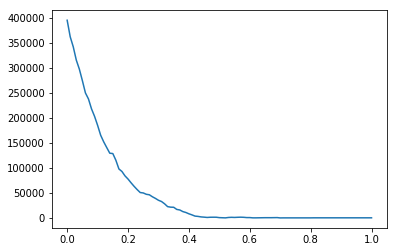

In [161]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, 1, 101), quinella_tune_2)

In [162]:
quinella_tune_2.argmax(), quinella_tune_2.max(), quinella_tune_2.max() / 100/ 5000

(0, 395000, 0.79)

In [163]:
# tuning threshold for exacta case
exacta_tune = []
for thresh in tqdm(np.linspace(0, 1., 101)):
    frame = deltas.loc[deltas[2] > thresh]
    incNum = []
    for ind in (frame.index):
        equal = prediction_table.loc[ind, :2].isin(y_true.loc[ind, :2]).all()
        incNum.append(int(equal))
    exacta_tune.append(-100*len(incNum) + 2310*sum(incNum))
exacta_tune = np.array(exacta_tune)

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [00:27<00:00,  3.73it/s]


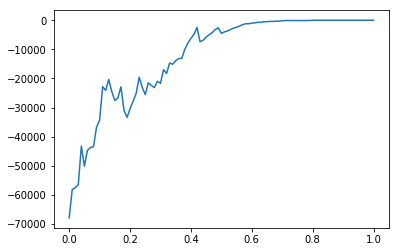

In [164]:
plt.plot(np.linspace(0, 1., 101), exacta_tune)

In [165]:
exacta_tune.max(), exacta_tune.argmax(), exacta_tune.max()/100/5000

(0, 80, 0.0)

In [166]:
# tuning threshold for trio case
trio_tune = []
for thresh in tqdm(np.linspace(0, 1., 101)):
    frame = deltas.loc[deltas[3] > thresh]
    incNum = []
    for ind in (frame.index):
        equal = prediction_table.loc[ind, :3].isin(y_true.loc[ind, :3]).all()
        incNum.append(int(equal))
    trio_tune.append(-100*len(incNum) + 320*sum(incNum))
trio_tune = np.array(trio_tune)

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [00:26<00:00,  3.78it/s]


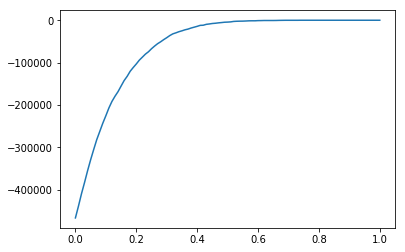

In [167]:
plt.plot(np.linspace(0, 1., 101), trio_tune)

In [168]:
trio_tune.max(), trio_tune.argmax(), trio_tune.max()/100/5000

(0, 74, 0.0)

In [169]:
# tuning threshold for trifecta case
trifecta_tune = []
for thresh in tqdm(np.linspace(0, 1., 101)):
    frame = deltas.loc[deltas[3] > thresh]
    incNum = []
    for ind in (frame.index):
        equal = prediction_table.loc[ind, :3].equals(y_true.loc[ind, :3])        
        incNum.append(int(equal))
    trifecta_tune.append(-100*len(incNum) + 3940*sum(incNum))
trifecta_tune = np.array(trio_tune)

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [00:19<00:00,  5.27it/s]


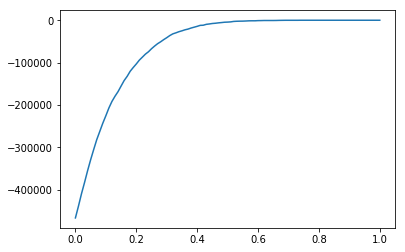

In [170]:
plt.plot(np.linspace(0, 1., 101), trifecta_tune)

In [171]:
trifecta_tune.max(), trifecta_tune.argmax(), trifecta_tune.max()/100/5000

(0, 74, 0.0)

In [172]:
# tuning bets
# tune threshold as abs predicted rank

In [173]:
rank_table_nom.head()

,1,2,3,4,5,6,7,8
raceinfo_id,,,,,,,,
47316,543.0,527.0,496.0,486.0,305.0,197.0,175.0,49.0
47317,549.0,434.0,432.0,273.0,263.0,100.0,90.0,61.0
47318,542.0,426.0,356.0,279.0,103.0,80.0,50.0,46.0
47319,515.0,500.0,428.0,408.0,320.0,254.0,170.0,78.0
47320,342.0,287.0,244.0,173.0,143.0,127.0,19.0,8.0


In [174]:
prediction_table.head()

,1,2,3,4,5,6,7,8
raceinfo_id,,,,,,,,
47316,2821,2608,208,810,2315,1005.0,2904.0,2532.0
47317,2402,2930,2728,2108,2505,3001.0,2813.0,3206.0
47318,2614,2804,1930,2415,2914,2927.0,2911.0,2931.0
47319,3109,2309,2305,2701,602,2908.0,502.0,2924.0
47320,2610,2815,2104,1932,1709,2901.0,2727.0,2920.0


In [175]:
rank_table_nom[[1, 2]].max(), rank_table_nom[[1, 2]].min()

(1    553.0
 2    550.0
 dtype: float64, 1    0.0
 2    0.0
 dtype: float64)

In [176]:
# quinella case | first place
tune = []

for threshold in tqdm(range(560, 0, -10)):
    frame_rank = rank_table_nom.loc[(rank_table_nom[1] > threshold) | 
                               (rank_table_nom[2] > threshold) ]
    frame_pred = prediction_table.loc[frame_rank.index][[1, 2]]
    
    incNum = []
    
    for ind in frame_pred.index:
        equal = frame_pred.loc[ind, :1].isin(y_true.loc[ind, :2]).any()
        incNum.append(int(equal))
    tune.append(-100*len(incNum) + 740*sum(incNum))


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [01:30<00:00,  1.61s/it]


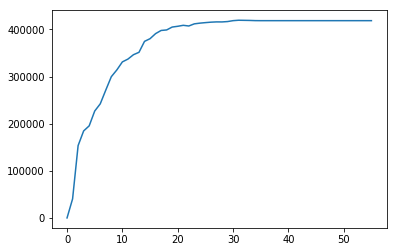

In [177]:
plt.plot(tune)

In [178]:
# quinella case | second place
tune = []

for threshold in tqdm(range(560, 0, -10)):
    frame_rank = rank_table_nom.loc[(rank_table_nom[1] > threshold) | 
                               (rank_table_nom[2] > threshold) ]
    frame_pred = prediction_table.loc[frame_rank.index][[1, 2]]
    incNum = []
    for ind in frame_pred.index:
        equal = frame_pred.loc[ind, 2:2].isin(y_true.loc[ind, :2]).any()
        incNum.append(int(equal))
    tune.append(-100*len(incNum) + 740*sum(incNum))

100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [01:30<00:00,  1.61s/it]


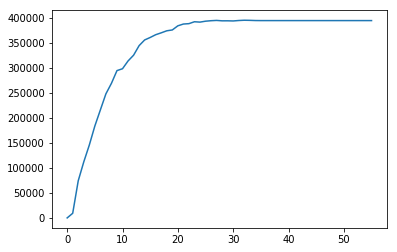

In [179]:
plt.plot(tune)

In [180]:
# exacta case 
tune = []
for threshold in tqdm(range(560, 0, -10)):
    frame_rank = rank_table_nom.loc[(rank_table_nom[1] > threshold) & 
                               (rank_table_nom[2] > threshold) ]
    frame_pred = prediction_table.loc[frame_rank.index][[1, 2]]
    incNum = []
    for ind in frame_pred.index:
        equal = frame_pred.loc[ind, :2].isin(y_true.loc[ind, :2]).all()
        incNum.append(int(equal))
    tune.append(-100*len(incNum) + 2310*sum(incNum))

100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [01:18<00:00,  1.40s/it]


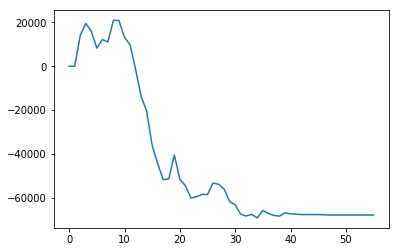

In [181]:
plt.plot(tune)

In [182]:
# trio case 
tune = []
for threshold in tqdm(range(560, 0, -10)):
    frame_rank = rank_table_nom.loc[(rank_table_nom[1] > threshold) & 
                               (rank_table_nom[2] > threshold) &
                                (rank_table_nom[3] > threshold)]
    frame_pred = prediction_table.loc[frame_rank.index][[1, 2, 3]]
    incNum = []
    for ind in frame_pred.index:
        equal = frame_pred.loc[ind, :3].isin(y_true.loc[ind, :3]).all()
        incNum.append(int(equal))
    tune.append(-100*len(incNum) + 320*sum(incNum))

100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [01:06<00:00,  1.18s/it]


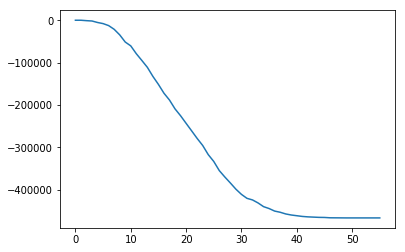

In [183]:
plt.plot(tune)

In [184]:
# Trifecta case 
tune = []
for threshold in tqdm(range(560, 0, -10)):
    frame_rank = rank_table_nom.loc[(rank_table_nom[1] > threshold) & 
                               (rank_table_nom[2] > threshold) &
                                (rank_table_nom[3] > threshold)]
    frame_pred = prediction_table.loc[frame_rank.index][[1, 2, 3]]
    incNum = []
    for ind in frame_pred.index:
        equal = frame_pred.loc[ind, :3].equals(y_true.loc[ind, :3])
        incNum.append(int(equal))
    tune.append(-100*len(incNum) + 3940*sum(incNum))

100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:50<00:00,  1.11it/s]


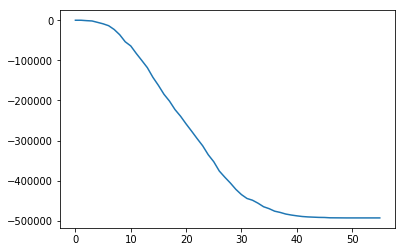

In [185]:
plt.plot(tune)

In [186]:
# TO BE DETERMINED

# make predicton for test dataset
# repeat preprocessing for interactions

In [187]:
# Can't unite train and test interactions matrix
# need set one big interaction matrix

In [188]:
pred_interactions['raceinfo_id'] = predict_frame['raceinfo_id']

In [189]:
pred_interactions.drop_duplicates(inplace=True)
pred_interactions.set_index('raceinfo_id', inplace=True)
pred_interactions.shape

(5049, 416)

In [190]:
interactions = pd.concat([hist_interactions, pred_interactions])
interactions.shape, hist_interactions.shape, pred_interactions.shape

((42994, 574), (37945, 554), (5049, 416))

In [191]:
interactions.fillna(0, inplace=True)
interactions.head()

,103,111,208,210,407,408,409,410,411,415,...,3311,3312,3313,9008,9009,9010,9011,9012,9013,9014
raceinfo_id,,,,,,,,,,,,,,,,,,,,,
7321,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7322,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7323,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7324,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7325,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# repeat preprocessing for interactions

In [192]:
interactions.shape

(42994, 574)

In [193]:
track_frame = pd.concat([history_frame[track_features], predict_frame[track_features]])
track_frame.drop_duplicates(inplace=True)
track_frame.head()

,raceinfo_id,distance,situation,raceclass_code,weather_name3,roadtemp,temp,humid,place_code,raceno
0,7321,3100,good,1,sunny,19.0,9,42,kawaguchi,1
8,7322,3100,good,1,sunny,20.0,9,38,kawaguchi,2
16,7323,3100,good,1,sunny,21.0,10,36,kawaguchi,3
24,7324,3100,good,1,sunny,21.0,10,35,kawaguchi,4
32,7325,3100,good,1,sunny,21.0,11,35,kawaguchi,5


In [194]:
track_frame.shape # correct shape

(42994, 10)

In [195]:
situation = pd.get_dummies(track_frame['situation'], prefix='situation')
situation.head(2)

,situation_good,situation_oil,situation_rash,situation_rough,situation_wet,situation_wind
0,1,0,0,0,0,0
8,1,0,0,0,0,0


In [196]:
weather = pd.get_dummies(track_frame['weather_name3'], prefix='weather')
weather.head(2)

,weather_cloud,weather_lightrain,weather_lightsnow,weather_rain,weather_snow,weather_sunny
0,0,0,0,0,0,1
8,0,0,0,0,0,1


In [197]:
place = pd.get_dummies(track_frame['place_code'], prefix='place_is')
place.head(2)

,place_is_funabashi,place_is_hamamatsu,place_is_iizuka,place_is_isesaki,place_is_kawaguchi,place_is_sanyou
0,0,0,0,0,1,0
8,0,0,0,0,1,0


In [198]:
track_frame.drop(columns=['situation', 'weather_name3', 'place_code'], inplace=True)

In [199]:
track_frame = pd.concat([track_frame, situation, weather, place], axis=1)
track_frame.head(3)

,raceinfo_id,distance,raceclass_code,roadtemp,temp,humid,raceno,situation_good,situation_oil,situation_rash,...,weather_lightsnow,weather_rain,weather_snow,weather_sunny,place_is_funabashi,place_is_hamamatsu,place_is_iizuka,place_is_isesaki,place_is_kawaguchi,place_is_sanyou
0,7321,3100,1,19.0,9,42,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
8,7322,3100,1,20.0,9,38,2,1,0,0,...,0,0,0,1,0,0,0,0,1,0
16,7323,3100,1,21.0,10,36,3,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [200]:
track_frame = track_frame.set_index('raceinfo_id')
track_frame.head()

,distance,raceclass_code,roadtemp,temp,humid,raceno,situation_good,situation_oil,situation_rash,situation_rough,...,weather_lightsnow,weather_rain,weather_snow,weather_sunny,place_is_funabashi,place_is_hamamatsu,place_is_iizuka,place_is_isesaki,place_is_kawaguchi,place_is_sanyou
raceinfo_id,,,,,,,,,,,,,,,,,,,,,
7321,3100,1,19.0,9,42,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7322,3100,1,20.0,9,38,2,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7323,3100,1,21.0,10,36,3,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7324,3100,1,21.0,10,35,4,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7325,3100,1,21.0,11,35,5,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


# preprocessing for racer features

In [201]:
interactions.shape, racer_frame.shape

((42994, 574), (554, 352))

In [202]:
add_hist = predict_frame.copy()
add_hist['hold_date'] = '1990'
full_racer_frame = pd.concat([history_frame[racer_features], add_hist[racer_features]])
full_racer_frame.shape

(343511, 340)

In [203]:
full_racer_frame.sort_values(by='hold_date', ascending=False, inplace=True)
full_racer_frame.drop_duplicates(subset=['player_code'], inplace=True)
full_racer_frame.shape # correct shape

(574, 340)

In [204]:
full_racer_frame.head(2)

,player_code,popular,motorbikeno,handicap,home,age,graduation,rank_now,rank_last,point,...,p2_Other_90_All_Here_rate1th,p2_Other_90_All_Here_rate2th,p2_Other_90_All_Here_rate3th,p2_Other_90_All_Here_raceaccident,p2_Other_90_All_Here_racehigh,p2_Other_90_All_Here_traialhigh,p2_Other_90_All_Here_stave,p2_Other_90_All_Here_shisou_hensa,p2_Other_90_All_Here_soutei_time,hold_date
303084,2607,2,8,20,0,39,26,A-53,A-58,80.425,...,0.0,0.0,0.0,0.0,3.432,3.33,0.10,3.404,3.424,2015-12-31 00:00:00
303105,2204,1,5,10,1,47,22,A-99,A-46,73.885,...,0.0,0.0,50.0,0.0,3.429,3.32,0.13,3.453,3.463,2015-12-31 00:00:00


In [205]:
obj_racer_cols = full_racer_frame.select_dtypes('object').columns
full_racer_frame[obj_racer_cols].head(3)

,rank_now,rank_last,last90_highplace,hold_date
303084,A-53,A-58,iizuka,2015-12-31 00:00:00
303105,A-99,A-46,kawaguchi,2015-12-31 00:00:00
303083,A-2,A-142,funabashi,2015-12-31 00:00:00


In [206]:
full_racer_frame.drop('hold_date', axis=1, inplace=True)

In [207]:
obj_racer_cols = obj_racer_cols[:-1]
obj_racer_cols

Index(['rank_now', 'rank_last', 'last90_highplace'], dtype='object')

In [208]:
full_racer_frame.shape

(574, 339)

In [209]:
full_racer_frame['rank_last_symbol'] = full_racer_frame['rank_last'].apply(lambda x: x[0] if type(x)==str else 'O')
full_racer_frame['rank_last_symbol'].unique()

array(['A', 'S', 'B', 'O'], dtype=object)

In [210]:
full_racer_frame['rank_now_symbol'] = full_racer_frame['rank_now'].apply(lambda x: x[0] if type(x)==str else 'O')
full_racer_frame['rank_now_symbol'].unique()

array(['A', 'S', 'B'], dtype=object)

In [211]:
symbols = pd.get_dummies(full_racer_frame[['rank_last_symbol', 'rank_now_symbol']])

In [212]:
last90_highplace_dummy = pd.get_dummies(full_racer_frame['last90_highplace'])

In [213]:
obj_racer_cols = full_racer_frame.select_dtypes('object').columns
obj_racer_cols

Index(['rank_now', 'rank_last', 'last90_highplace', 'rank_last_symbol',
       'rank_now_symbol'],
      dtype='object')

In [214]:
full_racer_frame.drop(columns=obj_racer_cols, inplace=True)

In [215]:
full_racer_frame = pd.concat([full_racer_frame, symbols, last90_highplace_dummy], axis=1)
full_racer_frame.shape

(574, 349)

In [216]:
full_racer_frame.head(3)

,player_code,popular,motorbikeno,handicap,home,age,graduation,point,last10_num1th,last10_num2th,...,rank_last_symbol_S,rank_now_symbol_A,rank_now_symbol_B,rank_now_symbol_S,funabashi,hamamatsu,iizuka,isesaki,kawaguchi,sanyou
303084,2607,2,8,20,0,39,26,80.425,1,2,...,0,1,0,0,0,0,1,0,0,0
303105,2204,1,5,10,1,47,22,73.885,0,1,...,0,1,0,0,0,0,0,0,1,0
303083,2808,2,7,20,0,34,28,89.720,0,1,...,0,1,0,0,1,0,0,0,0,0


In [217]:
full_racer_frame.sort_index(inplace=True)

In [218]:
full_racer_frame.head(2)

,player_code,popular,motorbikeno,handicap,home,age,graduation,point,last10_num1th,last10_num2th,...,rank_last_symbol_S,rank_now_symbol_A,rank_now_symbol_B,rank_now_symbol_S,funabashi,hamamatsu,iizuka,isesaki,kawaguchi,sanyou
25230,3313,3,1,0,0,22,33,NaN,0,0,...,0,0,1,0,0,0,1,0,0,0
25238,3310,2,1,0,0,22,33,NaN,0,0,...,0,0,1,0,0,0,1,0,0,0


In [219]:
full_racer_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 25230 to 303148
Columns: 349 entries, player_code to sanyou
dtypes: float64(201), int64(135), uint8(13)
memory usage: 1.5 MB


In [220]:
uint8_cols = full_racer_frame.select_dtypes('uint8').columns
full_racer_frame[uint8_cols] = full_racer_frame[uint8_cols].astype(np.int32)
full_racer_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 25230 to 303148
Columns: 349 entries, player_code to sanyou
dtypes: float64(201), int32(13), int64(135)
memory usage: 1.5 MB


In [221]:
interactions.shape, track_frame.shape, full_racer_frame.shape

((42994, 574), (42994, 24), (574, 349))

In [222]:
join_wins = pd.DataFrame(pd.concat([mean_wins, sum_wins, max_wins], axis=1))
join_wins.columns = ['mean_wins', 'sum_wins', 'max_wins']
join_wins.shape

(554, 3)

In [223]:
join_wins.head()

,mean_wins,sum_wins,max_wins
103,3.000000,18.0,15.0
111,1.166667,7.0,4.0
208,10.666667,64.0,44.0
210,3.333333,20.0,14.0
407,6.333333,38.0,38.0


In [224]:
full_racer_frame = full_racer_frame.merge(join_wins, left_on='player_code', right_index=True, how='left')
full_racer_frame.fillna(0, inplace=True)
full_racer_frame.head()

,player_code,popular,motorbikeno,handicap,home,age,graduation,point,last10_num1th,last10_num2th,...,rank_now_symbol_S,funabashi,hamamatsu,iizuka,isesaki,kawaguchi,sanyou,mean_wins,sum_wins,max_wins
25230,3313,3,1,0,0,22,33,0.0,0,0,...,0,0,0,1,0,0,0,0.0,0.0,0.0
25238,3310,2,1,0,0,22,33,0.0,0,0,...,0,0,0,1,0,0,0,0.0,0.0,0.0
25246,3309,4,1,0,1,21,33,0.0,0,0,...,0,0,0,1,0,0,0,0.0,0.0,0.0
25262,3301,2,1,0,1,27,33,0.0,0,0,...,0,0,0,1,0,0,0,0.0,0.0,0.0
25294,9008,4,1,0,0,21,33,0.0,0,0,...,0,0,0,0,0,0,1,0.0,0.0,0.0


In [225]:
interactions.shape, track_frame.shape, full_racer_frame.shape

((42994, 574), (42994, 24), (574, 352))

# make prediction model

In [226]:
predict_frame[['raceinfo_id', 'player_code']].head()

,raceinfo_id,player_code
0,52674,1315
1,52674,2119
2,52674,2005
3,52674,1214
4,52674,2514


In [227]:
# set ones in races to predict
for ind, line in tqdm(predict_frame[['raceinfo_id', 'player_code']].iterrows()):
    racenum, playernum = line
    interactions.loc[racenum, playernum] = 1

40362it [00:12, 3268.97it/s]


In [228]:
big_model = LightFM() # learning_rate=0.05
big_model.fit(coo_matrix(interactions), 
          user_features=csr_matrix(track_frame),
          item_features=csr_matrix(full_racer_frame),
          epochs=20, verbose=True)

Epoch: 100%|███████████████████████████████████████████████████████████████████████████| 20/20 [03:27<00:00, 10.36s/it]


In [229]:
pred_df = big_model.predict_rank(coo_matrix(interactions), 
                                 item_features=csr_matrix(full_racer_frame),
                                 user_features=csr_matrix(track_frame))

In [230]:
df = pd.DataFrame(pred_df.toarray(), index=interactions.index,
                 columns=interactions.columns)

In [231]:
df.tail()

,103,111,208,210,407,408,409,410,411,415,...,3311,3312,3313,9008,9009,9010,9011,9012,9013,9014
raceinfo_id,,,,,,,,,,,,,,,,,,,,,
62788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [232]:
df.tail().loc[:, df.tail().sum() != 0] # predicted rank

,2101,2215,2301,2305,2306,2410,2416,2511,2519,2529,...,2928,2934,3017,3101,3102,3115,3206,3215,9002,9006
raceinfo_id,,,,,,,,,,,,,,,,,,,,,
62788,360.0,0.0,297.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,70.0,0.0,0.0,281.0,131.0,0.0,341.0,0.0,0.0
62789,0.0,0.0,0.0,0.0,0.0,62.0,293.0,529.0,0.0,0.0,...,0.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62790,0.0,169.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62791,0.0,0.0,0.0,365.0,0.0,0.0,0.0,0.0,0.0,141.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,271.0,123.0
62792,0.0,0.0,0.0,0.0,471.0,0.0,0.0,0.0,542.0,0.0,...,0.0,0.0,0.0,81.0,0.0,0.0,310.0,0.0,0.0,0.0


# Save csv

In [233]:
pred_table = []
rank_table = []

for ind, line in tqdm(df.loc[predict_frame['raceinfo_id'].unique()].iterrows()):
    vlist = [(a,b) for a,b in zip(line, interactions.columns)]
    vlist = sorted(vlist, reverse=True)[:10]
    pred_table.append([ind, *(i[1] for i in vlist)])
    rank_table.append([ind, *(i[0] for i in vlist)])

5049it [00:01, 4970.32it/s]


In [234]:
# check 9 and 10 columns
rank_table = pd.DataFrame(rank_table)
rank_table.set_index(0, inplace=True)

In [235]:
rank_table.iloc[:, -2:].sum()

9     0.0
10    0.0
dtype: float64

In [236]:
rank_table.drop(columns=[9, 10], inplace=True)

In [237]:
pred_table = pd.DataFrame(pred_table)
pred_table.set_index(0, inplace=True)
pred_table.drop(columns=[9, 10], inplace=True)
pred_table.head(3)

,1,2,3,4,5,6,7,8
0,,,,,,,,
52674,1315,2119,1214,1604,2005,2013,2510,2514
52675,1542,2110,2224,3012,1618,3203,1907,1925
52676,1121,1932,2115,3114,2324,2321,1912,2114


In [238]:
pred_table['order'] = pred_table.apply(lambda x: '_'.join([str(i) for i in x]), axis=1)

In [239]:
pred_table.head(2)

,1,2,3,4,5,6,7,8,order
0,,,,,,,,,
52674,1315,2119,1214,1604,2005,2013,2510,2514,1315_2119_1214_1604_2005_2013_2510_2514
52675,1542,2110,2224,3012,1618,3203,1907,1925,1542_2110_2224_3012_1618_3203_1907_1925


In [240]:
pred_table.reset_index(inplace=True)
pred_table.rename(columns={0: 'raceinfo_id'}, inplace=True)
pred_table.head(3)

,raceinfo_id,1,2,3,4,5,6,7,8,order
0,52674,1315,2119,1214,1604,2005,2013,2510,2514,1315_2119_1214_1604_2005_2013_2510_2514
1,52675,1542,2110,2224,3012,1618,3203,1907,1925,1542_2110_2224_3012_1618_3203_1907_1925
2,52676,1121,1932,2115,3114,2324,2321,1912,2114,1121_1932_2115_3114_2324_2321_1912_2114


In [241]:
%%time
pred_table[['raceinfo_id', 'order']].to_csv('predict_hit_rate.csv', index=False)

Wall time: 11 ms


In [242]:
# add bets columns for each case
# NO tuning
pred_table['Quinella_(1st_place)'] = 5
pred_table['Quinella_(2nd_place)'] = 5
pred_table['Exacta'] = 0
pred_table['Trio'] = 0
pred_table['Trifecta'] = 0

In [243]:
%%time
pred_table[['raceinfo_id', 'order', 'Quinella_(1st_place)', 'Quinella_(2nd_place)', 
           'Exacta', 'Trio', 'Trifecta']].to_csv('predict_recovery_rate.csv', index=False)

Wall time: 13 ms


# to do